C:\Users\taehwan\AppData\Local\Temp\ipykernel_12636\2872662823.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('kospi3.csv', header=0, index_col=0, squeeze=True)


<AxesSubplot:xlabel='date'>

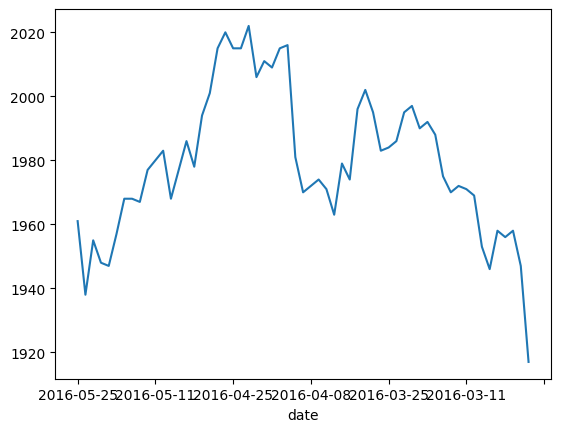

In [1]:
import pandas as pd

%matplotlib inline 

#2016-05-25 ~ 2016-02-29 까지의 코스피지수
series = pd.read_csv('kospi3.csv', header=0, index_col=0, squeeze=True)
series.plot()

C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


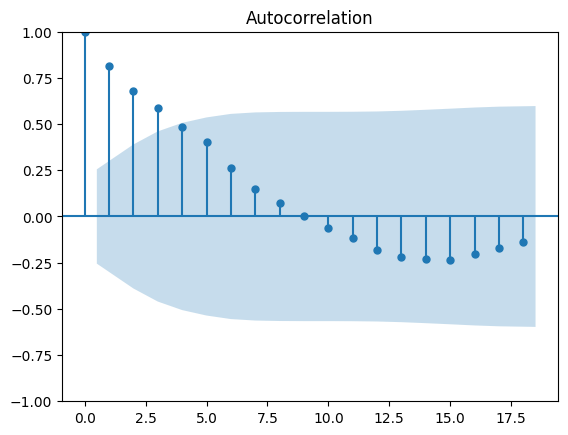

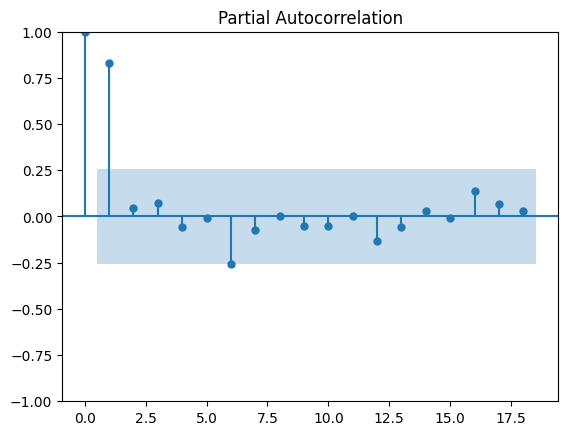

In [2]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF , PACF곡선 그리기 
plot_acf(series)
plot_pacf(series)
plt.show()

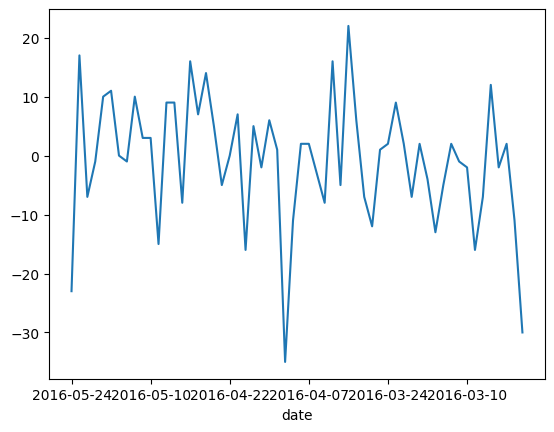

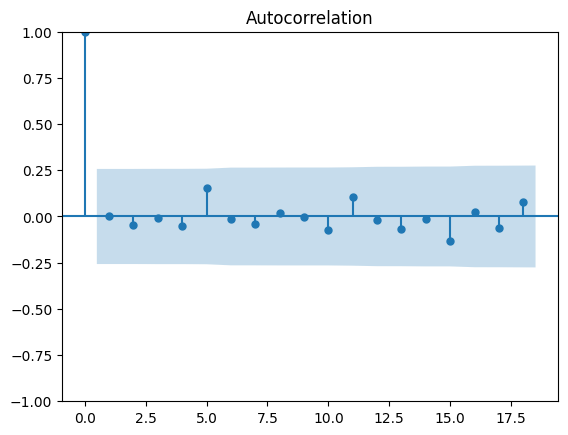

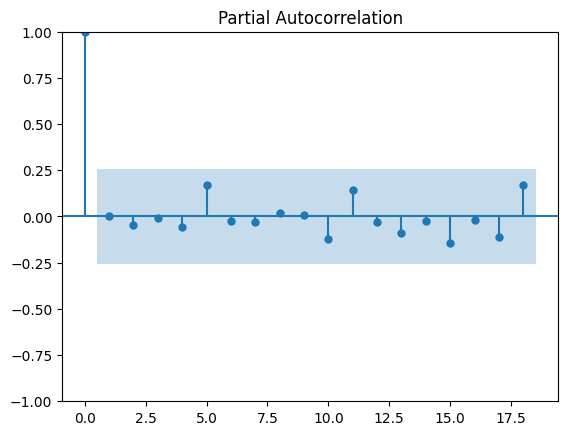

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#차분곡선 그래프
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

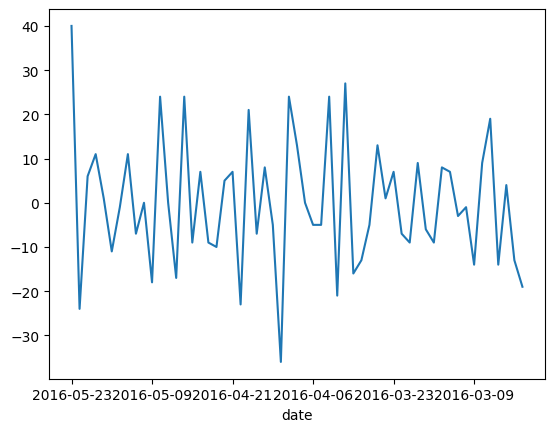

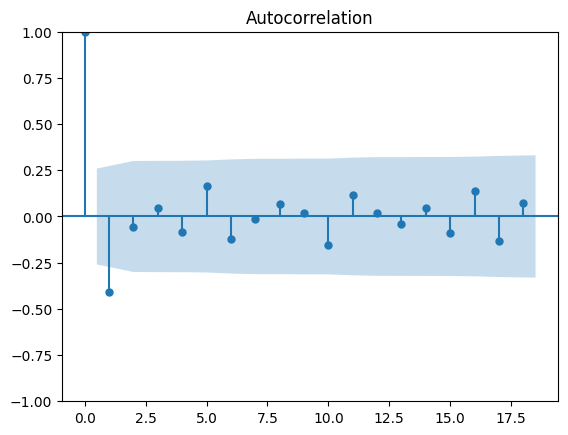

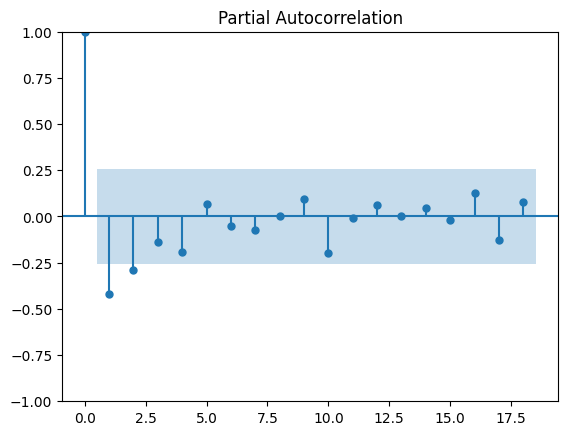

In [4]:
#차분의 차분의 그래프 그리기 

diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
plot_pacf(diff_2)
plt.show()

In [5]:
series

date
2016-05-25    1961
2016-05-24    1938
2016-05-23    1955
2016-05-20    1948
2016-05-19    1947
2016-05-18    1957
2016-05-17    1968
2016-05-16    1968
2016-05-13    1967
2016-05-12    1977
2016-05-11    1980
2016-05-10    1983
2016-05-09    1968
2016-05-04    1977
2016-05-03    1986
2016-05-02    1978
2016-04-29    1994
2016-04-28    2001
2016-04-27    2015
2016-04-26    2020
2016-04-25    2015
2016-04-22    2015
2016-04-21    2022
2016-04-20    2006
2016-04-19    2011
2016-04-18    2009
2016-04-15    2015
2016-04-14    2016
2016-04-12    1981
2016-04-11    1970
2016-04-08    1972
2016-04-07    1974
2016-04-06    1971
2016-04-05    1963
2016-04-04    1979
2016-04-01    1974
2016-03-31    1996
2016-03-30    2002
2016-03-29    1995
2016-03-28    1983
2016-03-25    1984
2016-03-24    1986
2016-03-23    1995
2016-03-22    1997
2016-03-21    1990
2016-03-18    1992
2016-03-17    1988
2016-03-16    1975
2016-03-15    1970
2016-03-14    1972
2016-03-11    1971
2016-03-10    1969
2016-03

In [6]:
from statsmodels.tsa.arima.model import ARIMA

#ARIMA(1,2,1)모델 만들고 훈련하기 
model = ARIMA(series, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   59
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -218.893
Date:                Fri, 28 Oct 2022   AIC                            443.786
Time:                        21:35:23   BIC                            449.915
Sample:                             0   HQIC                           446.168
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0136      0.222     -0.061      0.951      -0.448       0.421
ma.L1         -0.9413      0.119     -7.909      0.000      -1.175      -0.708
sigma2       122.2040     16.685      7.324      0.0

C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it i

In [7]:
from statsmodels.tsa.arima.model import ARIMA

#ARIMA(0,2,1)모델 만들고 훈련하기 
model = ARIMA(series, order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   59
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.897
Date:                Fri, 28 Oct 2022   AIC                            441.794
Time:                        21:35:23   BIC                            445.880
Sample:                             0   HQIC                           443.382
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9429      0.088    -10.697      0.000      -1.116      -0.770
sigma2       122.2154     16.696      7.320      0.000      89.493     154.938
Ljung-Box (L1) (Q):                   0.12   Jarque-

C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it i

In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   59
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.897
Date:                Fri, 28 Oct 2022   AIC                            441.794
Time:                        21:35:24   BIC                            445.880
Sample:                             0   HQIC                           443.382
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9429      0.088    -10.697      0.000      -1.116      -0.770
sigma2       122.2154     16.696      7.320      0.000      89.493     154.938
Ljung-Box (L1) (Q):                   0.12   Jarque-

C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it i

<AxesSubplot:xlabel='date'>

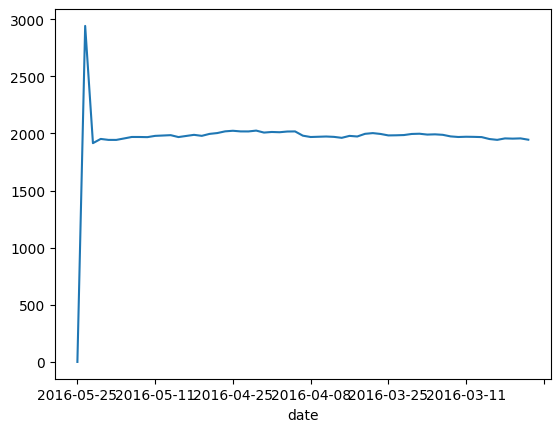

In [9]:
model_fit.predict().plot()

In [10]:
fore = model_fit.forecast(steps=1)
print(fore)

59    1913.759818
dtype: float64


C:\Users\taehwan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
